# Kaggle - San Francisco Crime Classification_6

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## EDA and Visualization

### 1. Dates

In [3]:
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)

train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


### 1-1) 시각화를 하기 전 예상

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같음.
2. 1년에 31일이 있는 달이 절반 정도 밖에 되지 않기 때문에 31일 데이터가 적게 나올것 같음.
3. 반면 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같음.

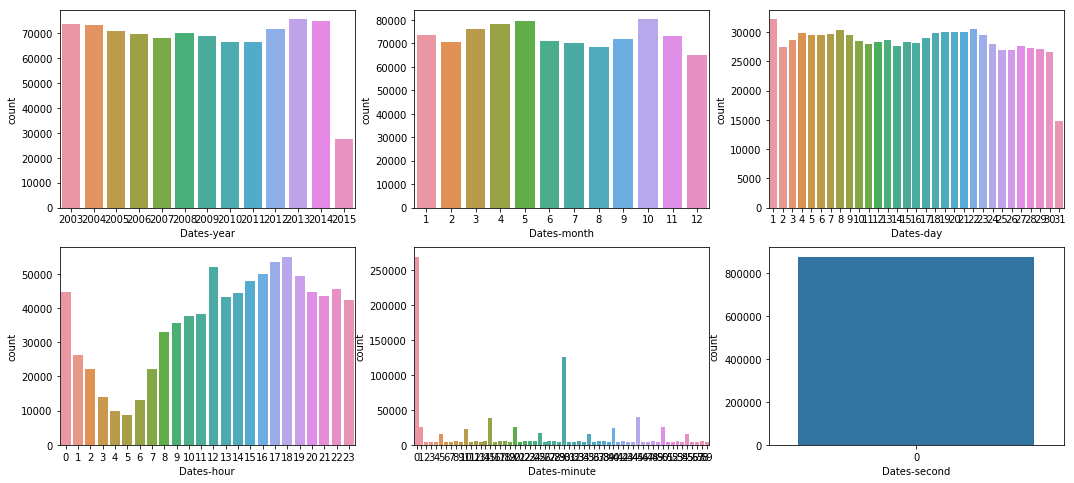

In [4]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. 초(```Dates-second```)는 전부 0으로 기록되어 있어 의미 있는 데이터가 아님. 분(```Dates-minute```)은 30분을 기준으로 15분 간격으로 높아지는 것이 보임.

2. 일(```Dates-day```) 31일을 제외 하면 크게 특징을 보이는 부분이 없음.

3. 시간(```Dates-hour```)에 따른 범죄 발생 비율이 다름. 새벽시간대에는 범죄 발생이 떨어짐.

### 1-3) 예측 모델 계선 가능성

1. 초(```Dates-second```)는 전부 다 0으로 feature 에 포함 시키지 않아도 될것 같음.
2. 시간(```Dates-hour```) 데이터는 예측하는데 큰 영향을 줄것 같음.
3. 31일이 있는 달이 1년의 절반 밖에 되지 않기 때문에 이를 참고 하여 학습을 시켜야 할것 같음.

### 2. X, Y

### 2-1) 시각화를 하기 전 예상

  1. 샌프란시스코의 좌표 데이터 이므로 샌프란시스코 지형과 비슷하게 나올 것 같음.
  2. 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 수도 있음.
  3. 범죄의 종류와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역도 존재 할 것 같음.

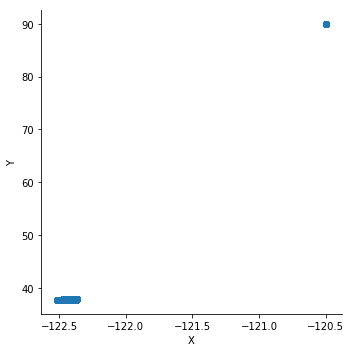

In [5]:
# X축에는 경도(Longitude)를 나타내는 X를, Y축에는 위도(Latitude)를 나타내는 Y를 지정
# 추세선을 그리지 않기 위해fit_reg 옵션에 False
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

아웃라이어가 있는 것으로 보임. 이를 정리해야 할것 같음.

In [6]:
# 경도(X)와 위도(Y)에서 가장 높은 값을 검색
# 이 데이터가 아웃라이어일 것으로 예상
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [7]:
# 경도(X)가 아웃라이어와 일치하면 True, 아니면 False인 결과
X_outliers = (train["X"] == train["X"].max())

# 위도(Y)가 아웃라이어와 일치하면 True, 아니면 False인 결과
Y_outliers = (train["Y"] == train["Y"].max())

# 경도(X)와 위도(Y)가 동시에 아웃라이어인 데이터만 색인
outlier = train[X_outliers & Y_outliers]

print(outlier.shape)

outlier

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,0


총 67개의 아웃라이어가 나왔음.

이를 제거하고 보는 것이 좋을 것 같음.

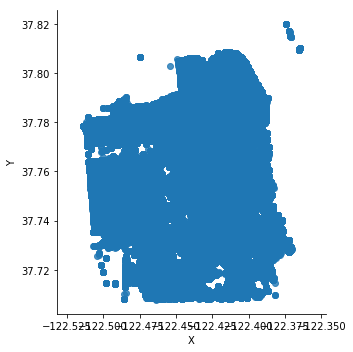

In [8]:
# 아웃라이어가 아닌(~) 데이터만 색인
non_outliers = train[~(X_outliers & Y_outliers)]

sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 아웃라이어를 제거한 후 샌프란시스코 지도와 유사한 그림을 확인.

2. 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재 함.

3. 지도 내부에 공백이 있는 부분이 있는데, 이 부분이 범죄가 일어나지 않은 지역일 수도 있으며 사람이 존재 할 수 없는 지역 일 수 도 있음.

### 2-3) 예측 모델 계선 가능성

1. 아웃라이어가 전체 데이터의 0.01%도 되지 않기 때문에, 이 아웃라이어를 해결한다고 모델의 성능이 좋아 지지는 않을 것 같음.
2. 범죄의 종류와 지역을 연결지어 볼 수도 있을 것 같음.
3. 열지도를 이용하여 범죄의 빈도수를 참고하여 머신러닝 모델에 집어 넣으면 성능이 좋아 질 것 같음.

### 3. DayOfWeek

### 3-1) 시각화를 하기 전 예상

1. 평일이냐 주말이냐에 따라 일어나게 되는 범죄의 종류와 그 횟수가 다를 것 같음.
2. 사람이 많이 몰릴수 있는 장소와 요일에 범죄가 집중 될 수 있을 것 같음.

In [9]:
train["Dates-DayOfWeek(int)"] = train["Dates"].dt.dayofweek

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-DayOfWeek(int)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,2


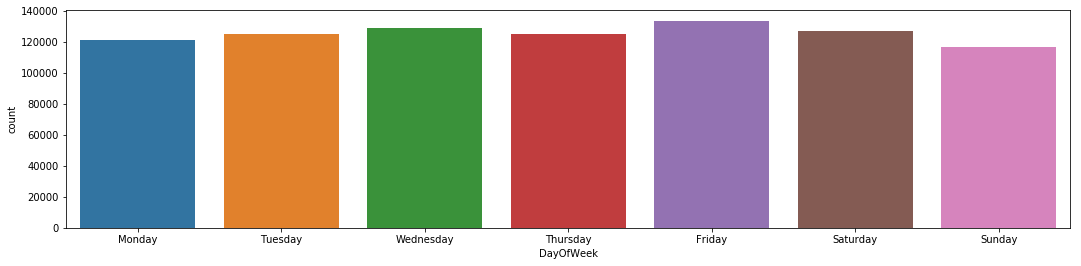

In [10]:
plt.figure(figsize = (18, 4))

dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.countplot(data=train, x="DayOfWeek", order=dayofweek_order)

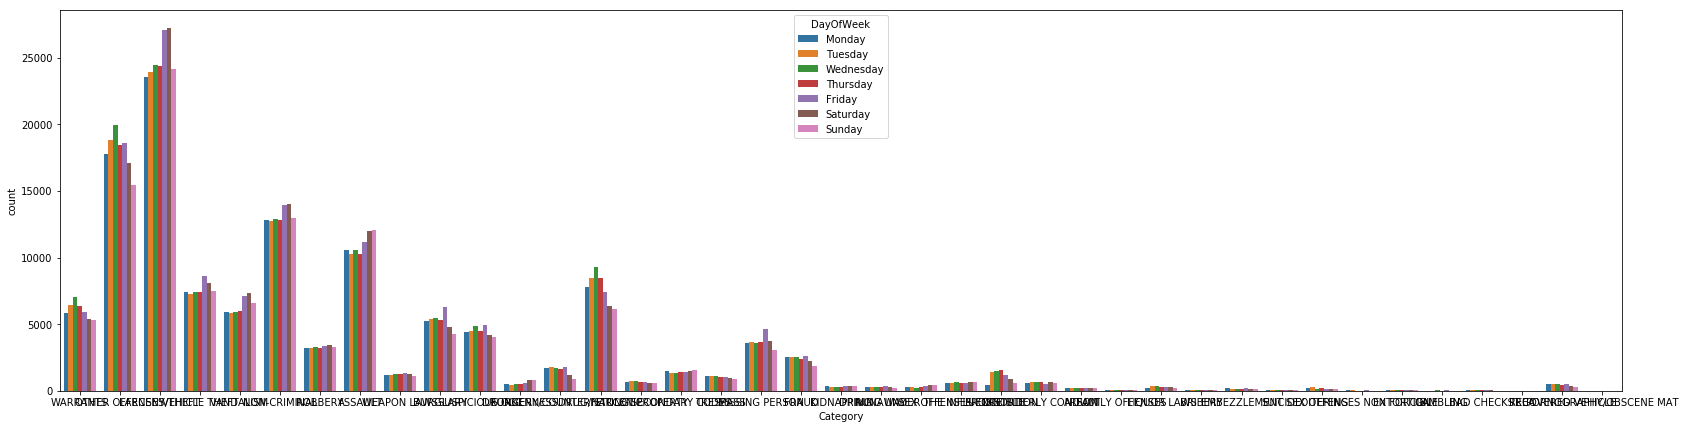

In [11]:
plt.figure(figsize = (28, 7))

sns.countplot(data=train, x="Category", hue="DayOfWeek", hue_order=dayofweek_order)

In [12]:
category_list = train["Category"].value_counts().index

category_list

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'DRIVING UNDER THE INFLUENCE', 'RUNAWAY', 'LIQUOR LAWS', 'ARSON',
       'LOITERING', 'EMBEZZLEMENT', 'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS',
       'BRIBERY', 'EXTORTION', 'SEX OFFENSES NON FORCIBLE', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype='object')

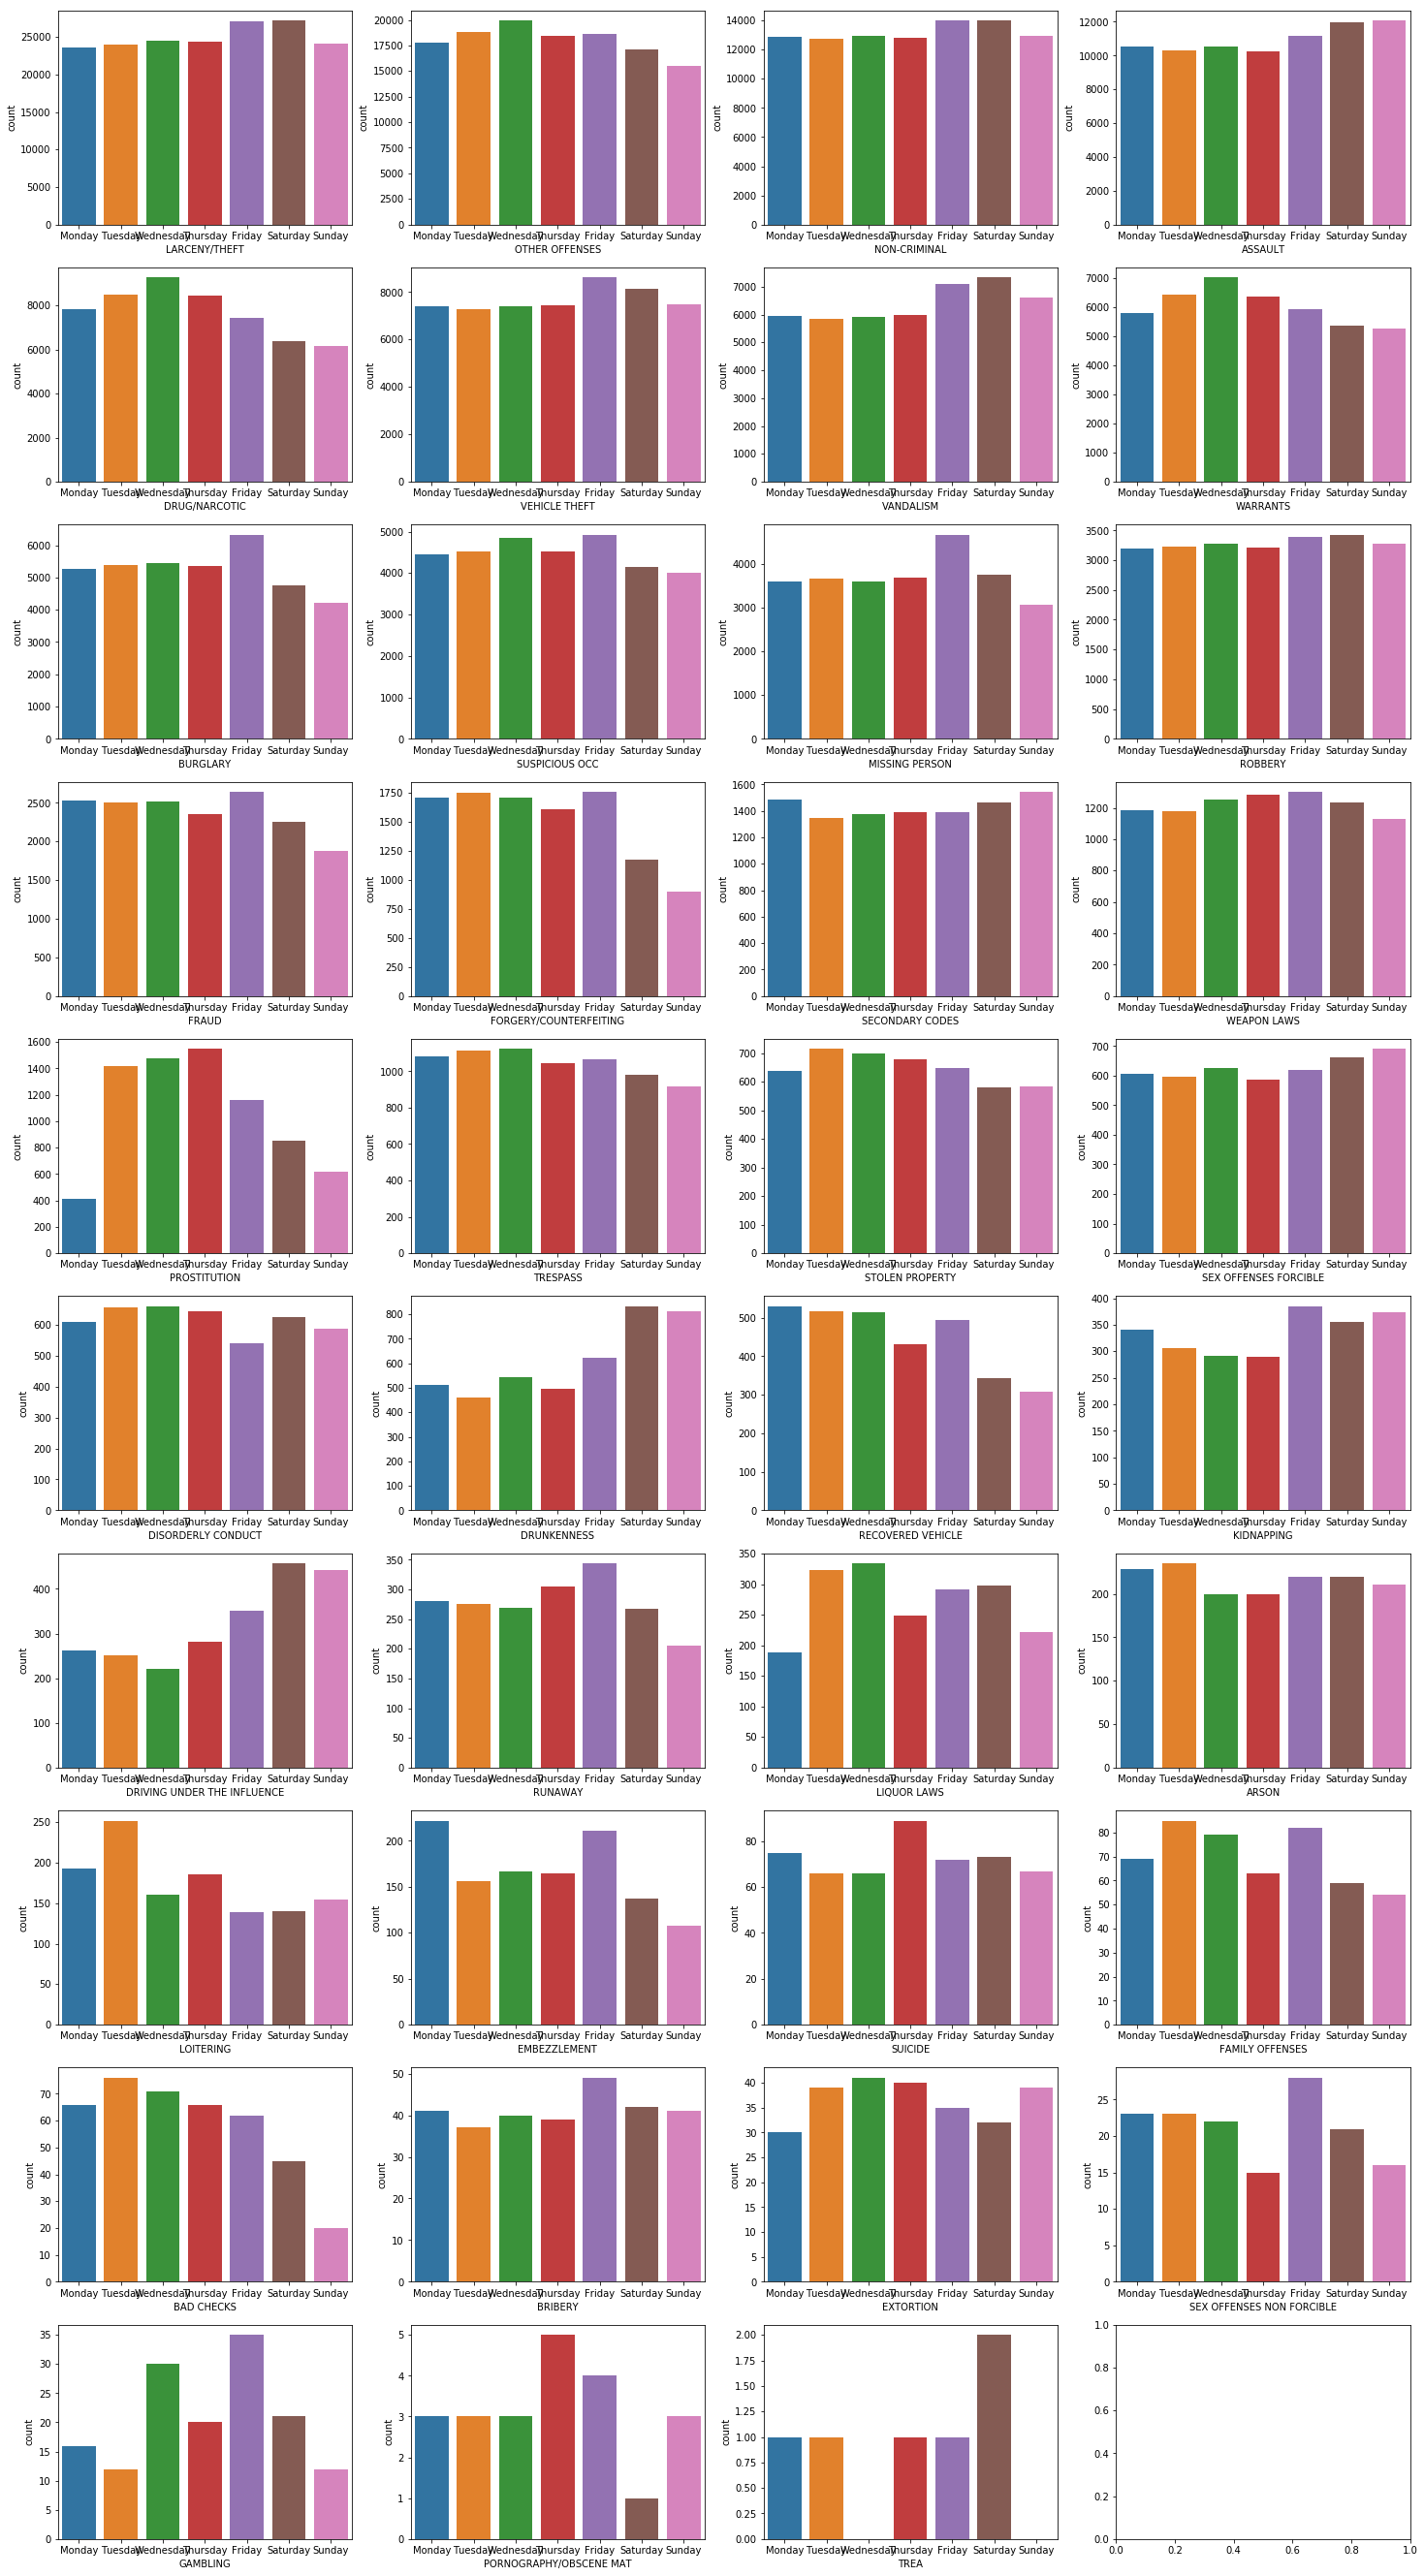

In [13]:
figure, axes = plt.subplots(nrows = 10, ncols =4)
figure.set_size_inches(25, 48)

for row in range(10):
    for column in range(4):
        index = row * 4 + column
                
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data=target, x="DayOfWeek", order=dayofweek_order, ax = ax)

            ax.set(xlabel = category)

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 각 요일마다의 전체 범죄 발생수는 크게 차이가 없음.

2. 각 범죄들 마다 요일별로 발생된 비율이 조금식 다름.

3. 범죄마다 주중에 많이 발생하는 범죄와, 주말에 많이 발생하는 범죄가 있음.

### 3-3) 예측 모델 계선 가능성

1. 요일별로 학습시켜야 할 듯 함.
2. 특정지역에는 특정요일에 일어난 범죄가 있는데 이를 살펴 보기.
3. 요일이 범죄를 판가름하는데 중요한 영향을 줌.
4. 범죄마다 중요한 요일의 타입이 다름.

### 4. PdDistrict

### 4-1) 시각화를 하기 전 예상

1. 특정 지역에 범죄를 전담하는 관할 경찰서가 있을 수 있음.
2. 관할 경찰서에 다루는 범죄의 양이 다를 것임.
3. 좌표에 따라 겹치게 되는 관할 구역도 있을 수 있음.
4. 관할 경찰서가 곧 지역을 구분하는 기준되기에 범죄가 많이 발생하는 지역에 관할 경찰서의 범죄 발생 횟수가 높을 것 같음.

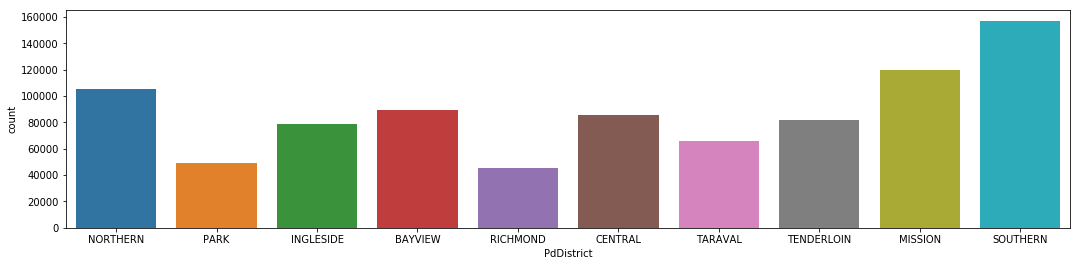

In [14]:
plt.figure(figsize = (18, 4))

sns.countplot(data=train, x="PdDistrict")

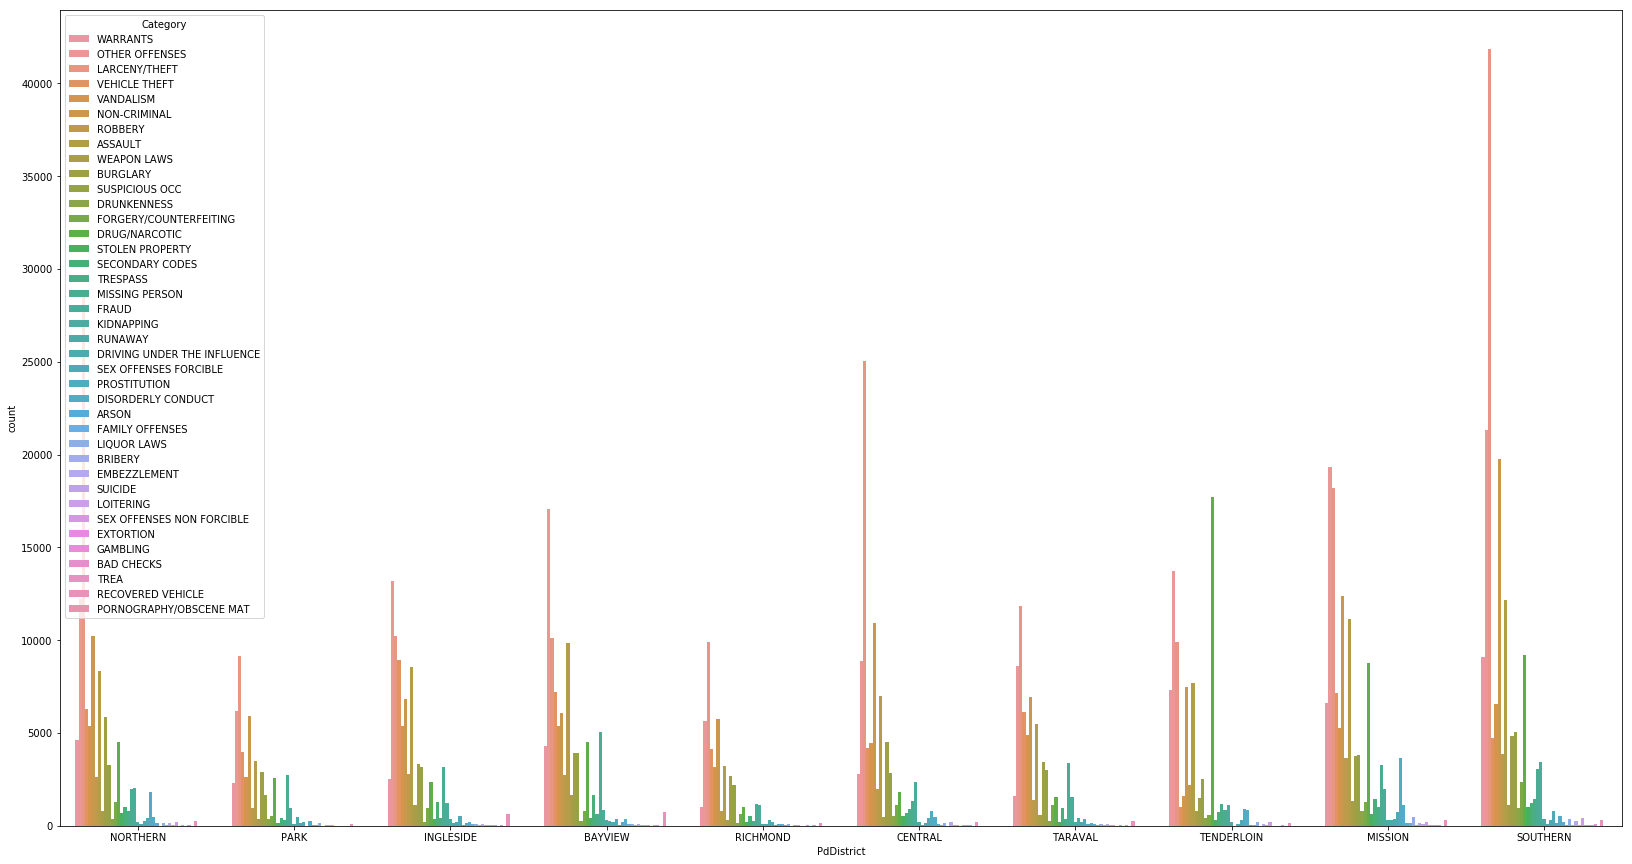

In [15]:
plt.figure(figsize = (28, 15))

sns.countplot(data=train, x="PdDistrict", hue="Category")

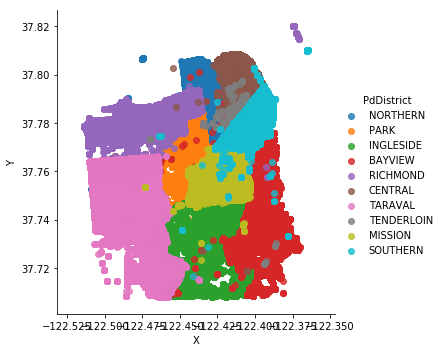

In [16]:
sns.lmplot(data=non_outliers, x="X", y="Y", hue="PdDistrict", fit_reg=False)

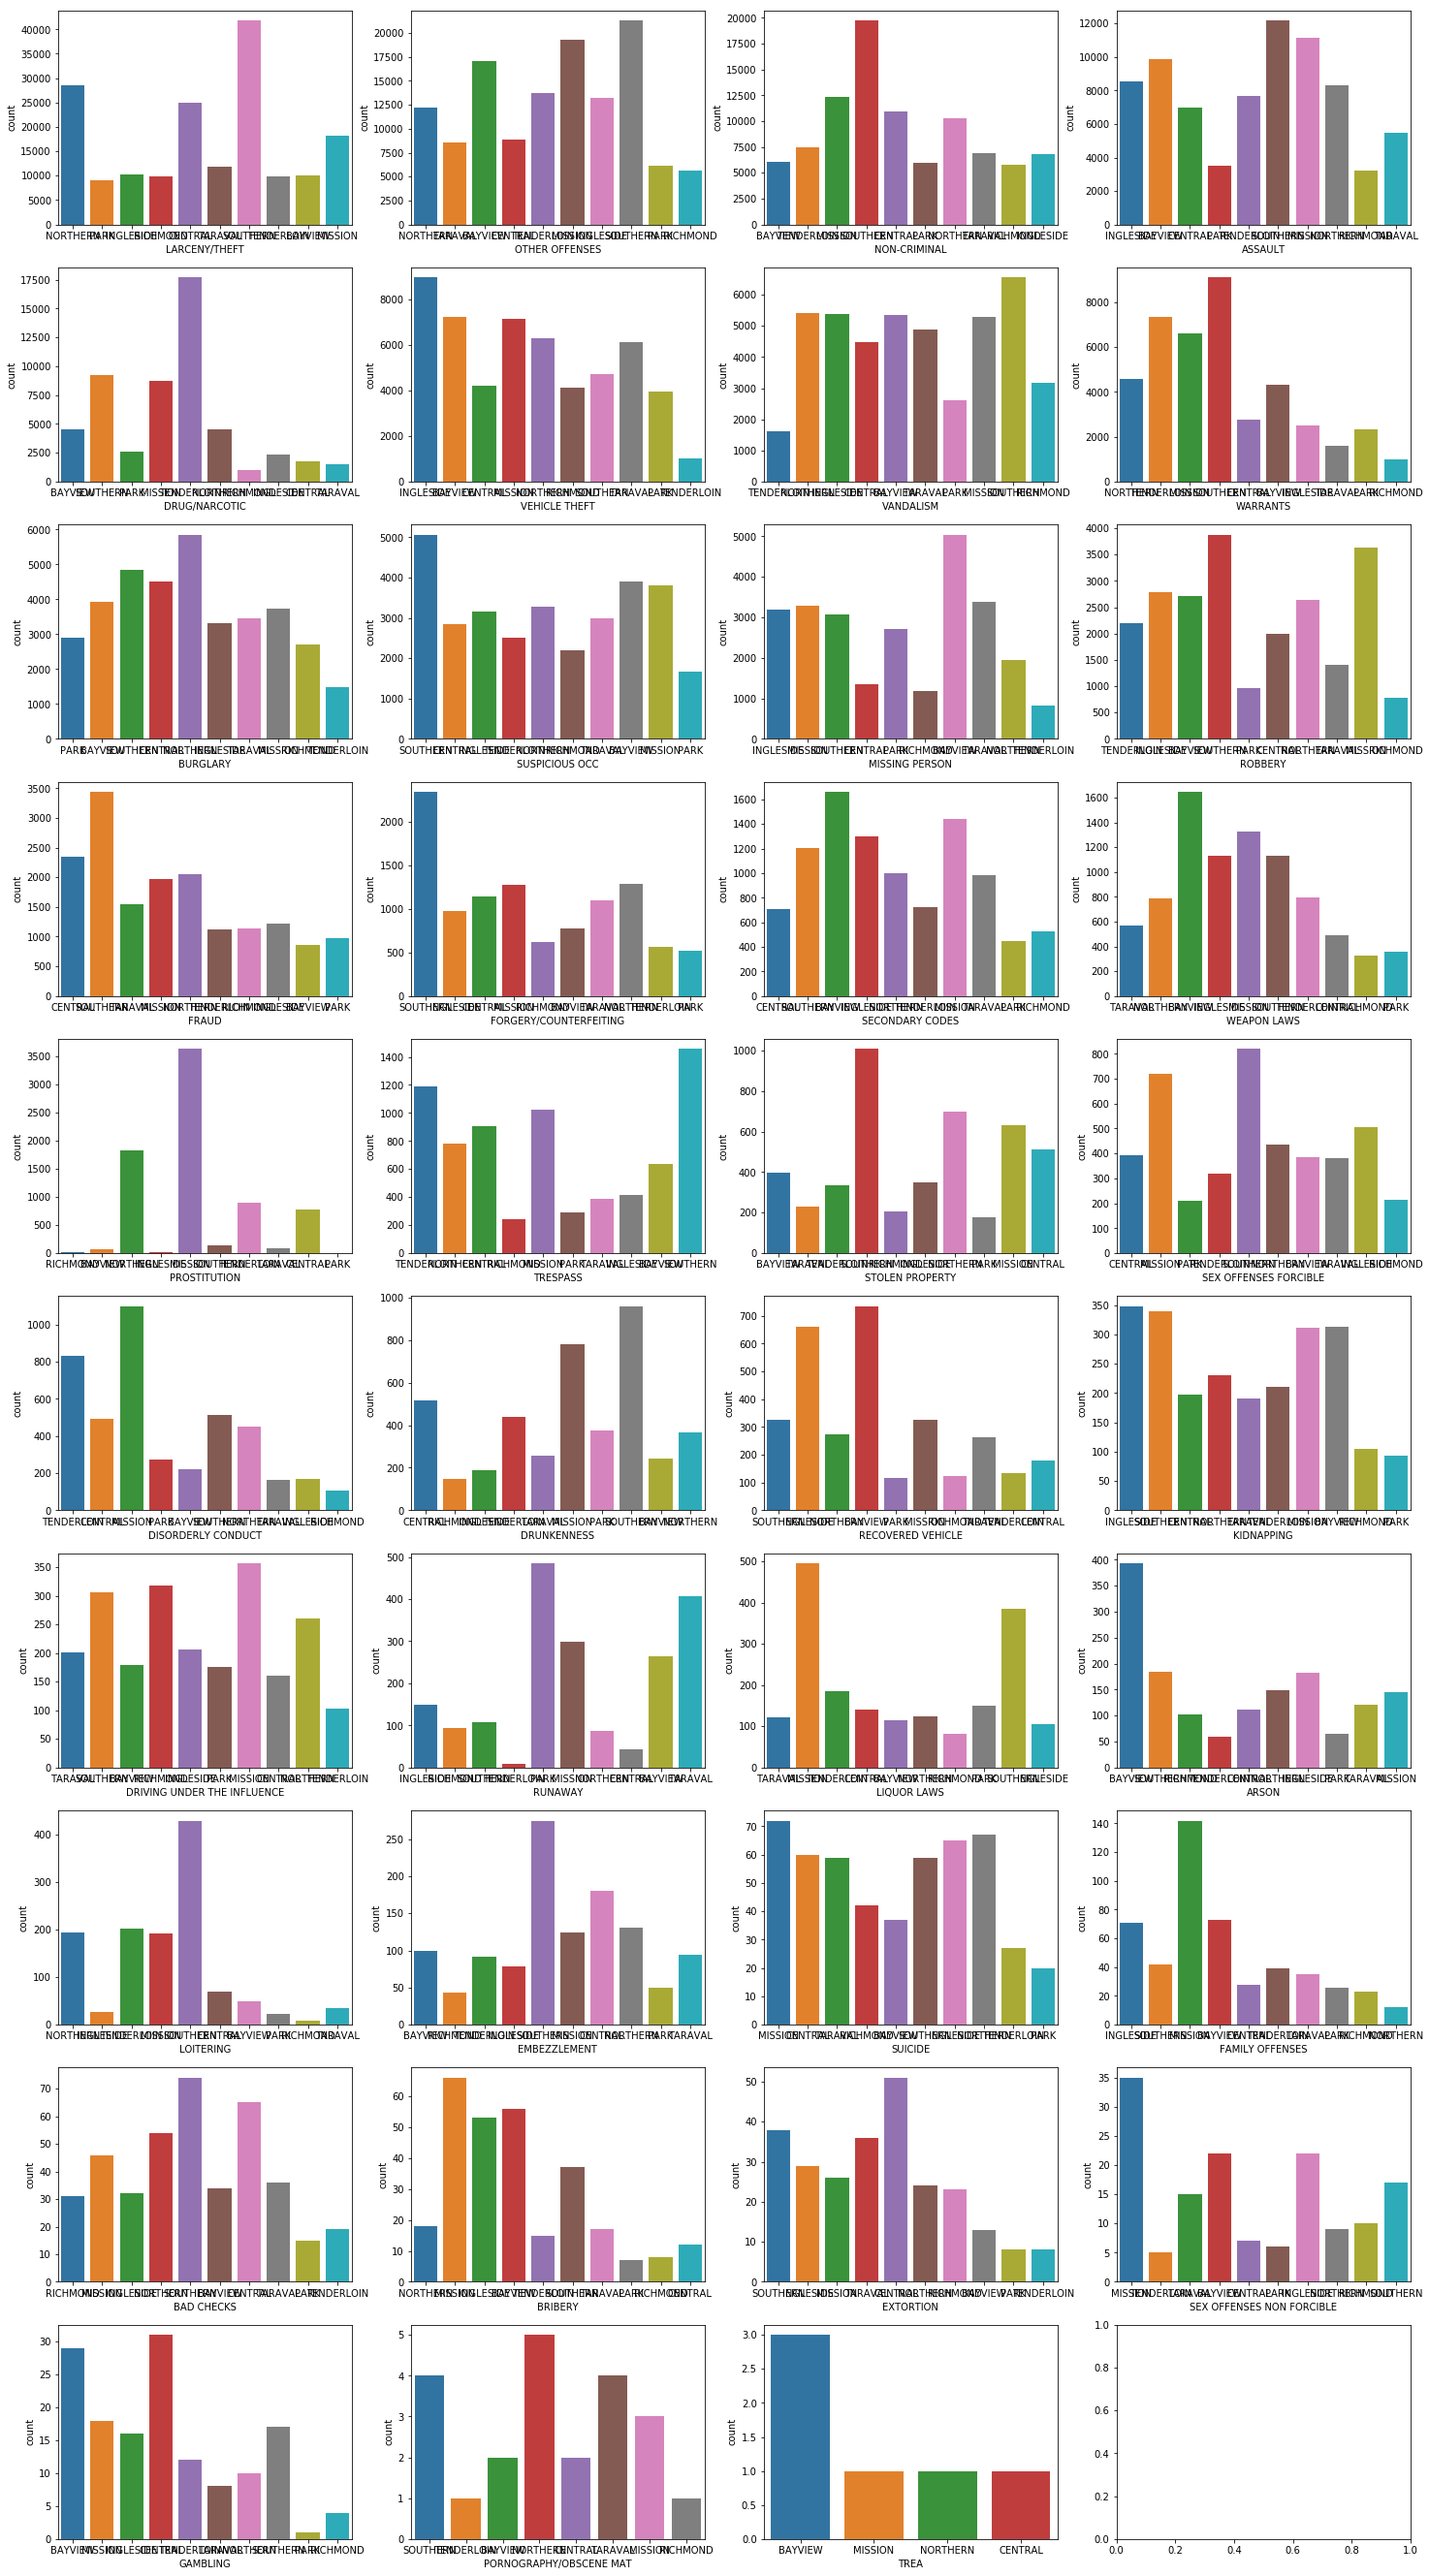

In [17]:
figure, axes = plt.subplots(nrows = 10, ncols =4)
figure.set_size_inches(25, 48)

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data=target, x="PdDistrict", ax = ax)

            ax.set(xlabel = category)

### 4-2) 이 시각화로 발견할 수 있는 사실
1. Southen 지역의 경우 유난히 높은 범죄률을 보여주는 항목이 있으며, 범죄율 자체도 높음.
2. 관할지역에 따라 높은 곳이 있고, 낮은 지역도 있음.
3. 정해진 구역을 넘어서는 지점도 보이기도 함.
4. 특특정 경찰서마다 자주 발생하는 범죄와, 그렇지 않는 범죄가 존재 함.

### 4-3)  예측 모델 계선 가능성
1. 관할 구역을 넘어서서 담당하게 되는 범죄의 종류를 구별 하는 것이 좋을 것 같음.
2. 관할 경찰서를 One Hot Encording 해서 집어 넣으면 훨씬 좋아 질것 같다.
3. 관할 경찰서는 결국 지역 데이터를 내므로 주소(Adress), 좌표(X,Y)와 엮어서 사용 할 방법을 찾음.

### 5. Adress

### 5-1) 시각화를 하기 전 예상

1. X, Y 와 같은 위도, 경도 정보와는 또 다른 정보를 줄 수 있을 것 같음.
2. 교차점 혹은 일반 도로위에서 어떤 범죄가 있을지 알 수 있을 것 같음.

In [18]:
# / 가 포함된 주소를 Cross 라 하고 / 포함되면 True 아니면 False
train["Cross"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Cross"]].head()

(878049, 17)


,Address,Cross
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


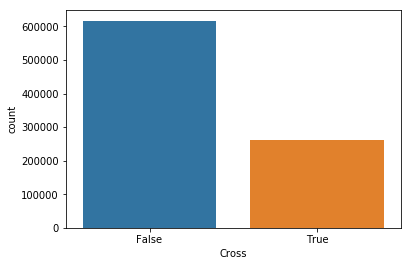

In [19]:
# Cross 에서 발생된 범죄
sns.countplot(data=train, x="Cross")

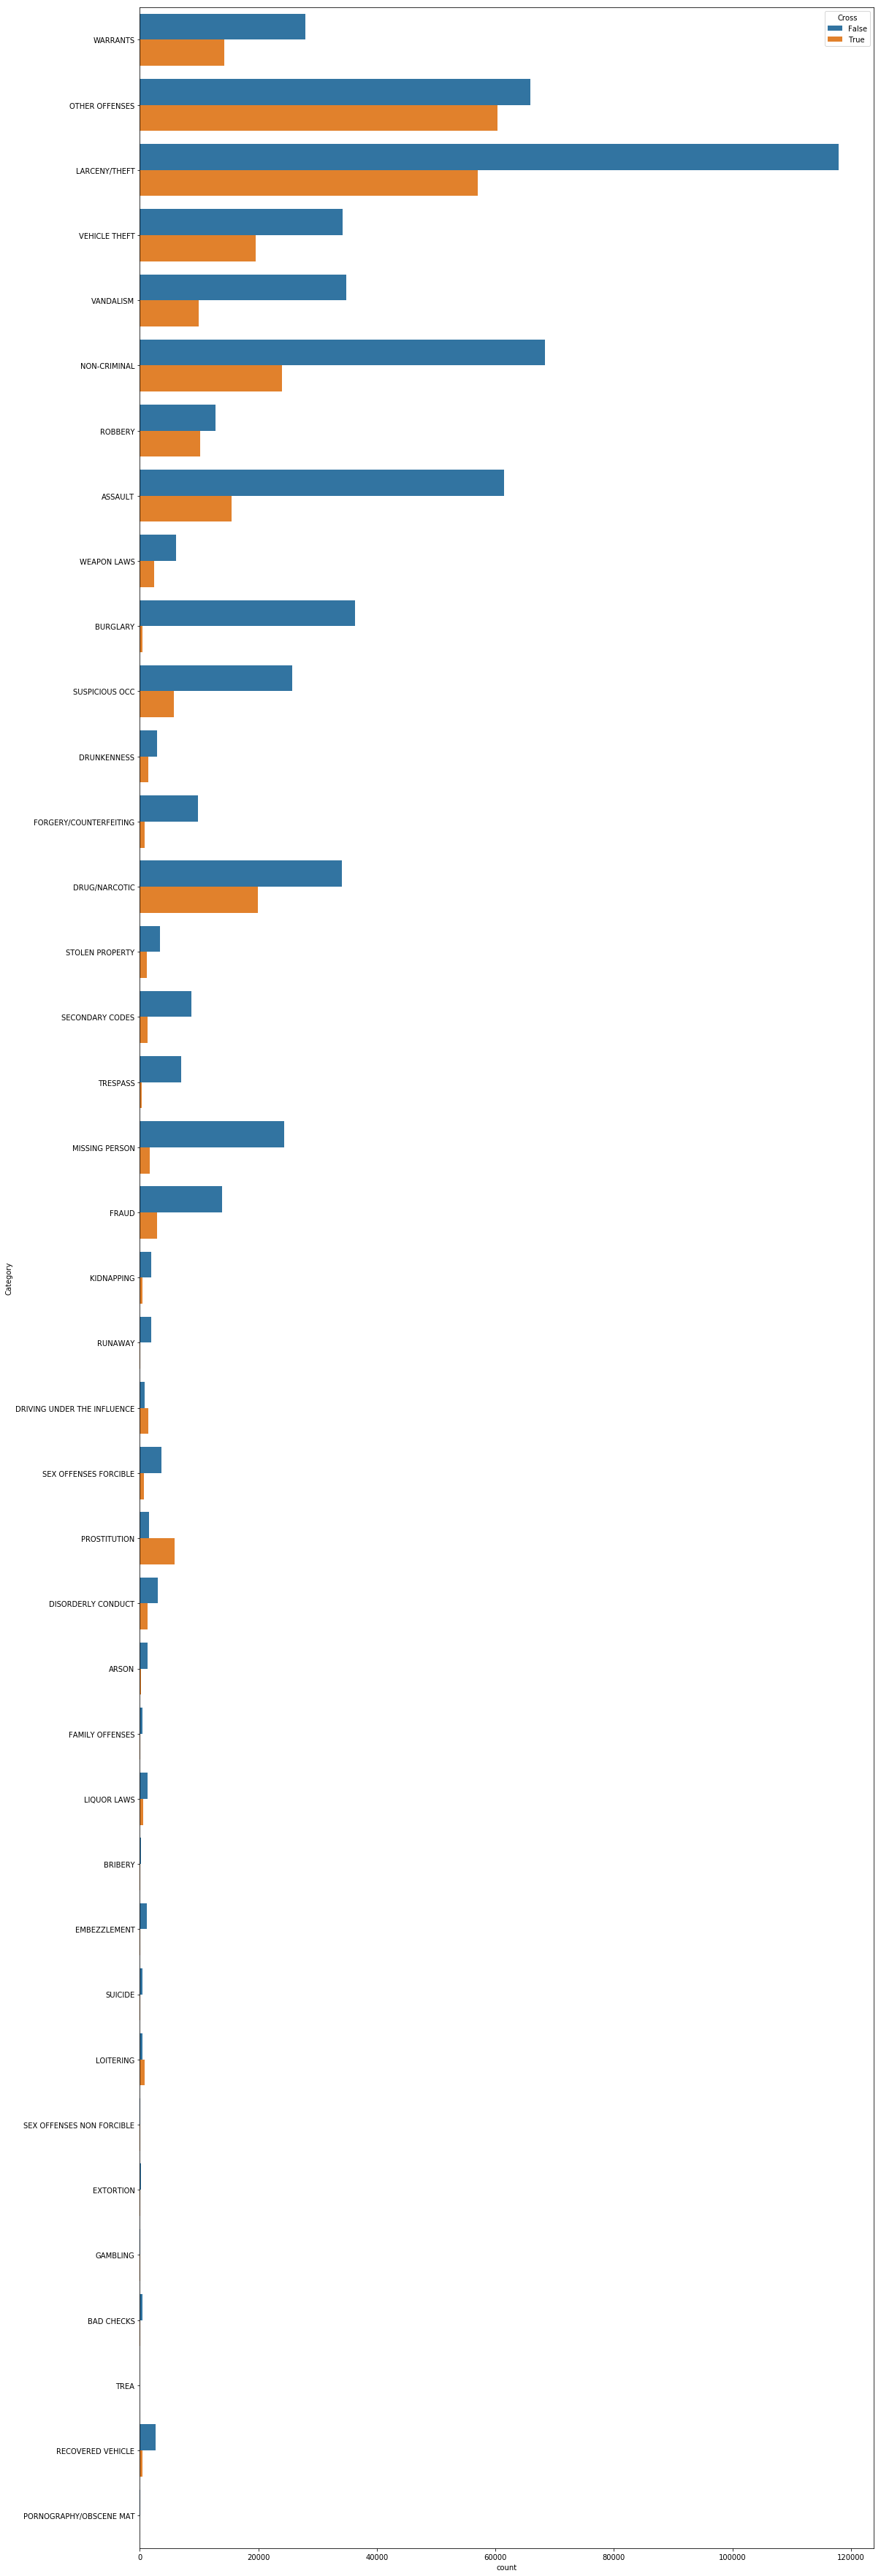

In [20]:
# Cross 에서 발생된 범죄 종류
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Cross", y="Category")

### 5-2) 이 시각화로 발견할 수 있는 사실

1. Cross와 그렇지 않은 곳이 특정 범죄에 따라 발생 빈도의 차이가 있음을 알 수 있음.

### 5-3)  예측 모델 계선 가능성

1. Cross 를 그대로 Feature 로 넣어도 될 것 같음.

## Reload Dataset

In [21]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [22]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing

### 1. Dates

In [23]:
# 데이터타입으로 Dates 변환 
train["Dates"] = pd.to_datetime(train["Dates"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)

train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [24]:
# test 데이터도 데이터타입으로 Dates 변환 
test["Dates"] = pd.to_datetime(test["Dates"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)

test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### 2. Encode DayofWeek

In [25]:
# 각각의 요일로 붙여주기
train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix="DayOfWeek")

train = pd.concat([train, train_dayofweek], axis = 1)

print(train.shape)

train.head()

(878049, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,0,0,0,0,0,0,1


In [26]:
# test 각각의 요일로 붙여주기
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix="DayOfWeek")

test = pd.concat([test, test_dayofweek], axis = 1)

print(test.shape)

test.head()

(884262, 20)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,0,0,0,1,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,0,0,0,1,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0


### 3. Encode PDdistrict

In [27]:
# 관할지역별 붙여주기 

train_PdDistrict = pd.get_dummies(train["PdDistrict"], prefix="PdDistrict")

train = pd.concat([train, train_PdDistrict], axis = 1)

print(train.shape)
train.head()

(878049, 32)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# test 관할지역 붙여주기

test_PdDistrict = pd.get_dummies(test["PdDistrict"], prefix="PdDistrict")

test = pd.concat([test, test_PdDistrict], axis = 1)

print(test.shape)
test.head()

(884262, 30)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,0,1,0,0,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0


### 4. Adress

In [29]:
train["Cross"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Cross"]].head()

(878049, 33)


,Address,Cross
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [30]:
test["Cross"] = test["Address"].str.contains("/")

print(test.shape)
test[["Address", "Cross"]].head()

(884262, 31)


,Address,Cross
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


### 5. Encode Address

In [31]:
# one hot encoding
train_address = pd.get_dummies(train["Address"])

print(train_address.shape)
train_address.head()

(878049, 23228)


,0 Block of HARRISON ST,0 Block of 10TH AV,0 Block of 10TH ST,0 Block of 11TH ST,0 Block of 12TH AV,0 Block of 12TH ST,0 Block of 13TH ST,0 Block of 14TH AV,0 Block of 14TH ST,0 Block of 15TH AV,...,YOSEMITE AV / MENDELL ST,YOSEMITE AV / WILLIAMS AV,YUKON ST / 19TH ST,YUKON ST / EAGLE ST,ZAMPA LN / GEARY BL,ZENO PL / FOLSOM ST,ZOE ST / BRANNAN ST,ZOE ST / BRYANT ST,ZOE ST / FREELON ST,ZOE ST / WELSH ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train[train["Address"] == "LAGUNA ST / OAK ST"].head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Cross
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2013,...,0,0,0,1,0,0,0,0,0,True
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2013,...,0,0,0,1,0,0,0,0,0,True
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2012,...,0,0,0,1,0,0,0,0,0,True
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2011,...,0,0,0,1,0,0,0,0,0,True
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2011,...,0,0,0,1,0,0,0,0,0,True


In [33]:
train[train["Address"] == "OAK ST / LAGUNA ST"].head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Cross
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,1,0,0,0,0,0,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,1,0,0,0,0,0,True
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,1,0,0,0,0,0,True
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,1,0,0,0,0,0,True
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,...,0,0,0,1,0,0,0,0,0,True


In [34]:
# 겹치는 도로를 줄이기 위한 정의문
def clean_address(address):
    if "/" not in address:
        return address
    
    address1, address2 = address.split("/")
    address1, address2 = address1.strip(), address2.strip()

    if address1 < address2:
        address = "{} / {}".format(address1, address2)
    else:
        address = "{} / {}".format(address2, address1)
    
    return address

train["Address(clean)"] = train["Address"].apply(clean_address)

print(train.shape)
train[["Address", "Address(clean)"]].head()

(878049, 34)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [35]:
test["Address(clean)"] = test["Address"].apply(clean_address)

print(test.shape)
test[["Address", "Address(clean)"]].head()

(884262, 32)


,Address,Address(clean)
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [36]:
# 정리된 갯수 확인
len(train["Address"].unique()), len(train["Address(clean)"].unique())

(23228, 17812)

In [37]:
address_counts = train["Address(clean)"].value_counts()
address_counts

800 Block of BRYANT ST             26533
800 Block of MARKET ST              6581
2000 Block of MISSION ST            5097
1000 Block of POTRERO AV            4063
16TH ST / MISSION ST                3804
900 Block of MARKET ST              3251
0 Block of TURK ST                  3228
0 Block of 6TH ST                   2884
300 Block of ELLIS ST               2703
400 Block of ELLIS ST               2590
1000 Block of MARKET ST             2489
1100 Block of MARKET ST             2319
2000 Block of MARKET ST             2168
TAYLOR ST / TURK ST                 2167
100 Block of OFARRELL ST            2140
700 Block of MARKET ST              2081
3200 Block of 20TH AV               2035
100 Block of 6TH ST                 1887
500 Block of JOHNFKENNEDY DR        1824
200 Block of TURK ST                1800
0 Block of PHELAN AV                1791
0 Block of UNITEDNATIONS PZ         1789
0 Block of POWELL ST                1717
LEAVENWORTH ST / TURK ST            1709
100 Block of EDD

In [38]:
# 100개 이상의 주소만 출력
top_address_counts = address_counts[address_counts >= 100]
top_address_counts = top_address_counts.index

print(len(top_address_counts.shape))
top_address_counts

1


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       '300 Block of 8TH ST', 'OAKDALE AV / RANKIN ST', 'BEALE ST / BRYANT ST',
       '300 Block of BUCHANAN ST', '0 Block of ZOO RD',
       '2100 Block of FULTON ST', '700 Block of WEBSTER ST',
       '14TH ST / SOUTH VAN NESS AV', '22ND ST / 3RD ST',
       '1800 Block of IRVING ST'],
      dtype='object', length=1719)

In [39]:
# 100개 미만의 주소는 모두 'Other'로 처리
train.loc[~train["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"

print(train.shape)
train[["Address", "Address(clean)"]].head()

(878049, 34)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [40]:
test.loc[~test["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"

print(test.shape)
test[["Address", "Address(clean)"]].head()

(884262, 32)


,Address,Address(clean)
0,2000 Block of THOMAS AV,Others
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,Others
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [41]:
len(train["Address"].unique()), len(train["Address(clean)"].unique())

(23228, 1720)

In [42]:
# 정리한 주소로 one hot encoding
train_address = pd.get_dummies(train["Address(clean)"])

print(train_address.shape)
train_address.head()

(878049, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_address = pd.get_dummies(test["Address(clean)"])

print(test_address.shape)
test_address.head()

(884262, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# '0'이 너무 많아서 csr_matrix 를 사용하여 간편하게 정리
from scipy.sparse import csr_matrix

train_address = csr_matrix(train_address)
train_address

<878049x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [45]:
test_address = csr_matrix(test_address)
test_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

### 5.  Minutes

In [46]:
# 30분씩 빼서 한 곳으로 모음
train["Dates-minute(abs)"] = np.abs(train["Dates-minute"] - 30)

print(train.shape)

train[["Dates-minute", "Dates-minute(abs)"]].head()

(878049, 35)


,Dates-minute,Dates-minute(abs)
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0


In [47]:
test["Dates-minute(abs)"] = np.abs(test["Dates-minute"] - 30)

print(test.shape)

test[["Dates-minute", "Dates-minute(abs)"]].head()

(884262, 33)


,Dates-minute,Dates-minute(abs)
0,59,29
1,51,21
2,50,20
3,45,15
4,45,15


## Train

In [48]:
feature_names = ["X", "Y", "Dates-year", "Dates-month","Dates-day", "Dates-hour", "Cross"]

feature_names = feature_names + list(train_dayofweek.columns)
feature_names = feature_names + list(train_PdDistrict.columns)

feature_names

['X',
 'Y',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Cross',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [49]:
lable_name = "Category"

lable_name

'Category'

In [50]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(878049, 24)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Cross,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,2015,5,13,23,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,2015,5,13,23,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,2015,5,13,23,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,2015,5,13,23,False,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,2015,5,13,23,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_address])
X_train

<878049x1744 sparse matrix of type '<class 'numpy.float64'>'
	with 8118394 stored elements in COOrdinate format>

In [52]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(884262, 24)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Cross,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,2015,5,10,23,False,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,2015,5,10,23,True,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,2015,5,10,23,False,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,2015,5,10,23,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,2015,5,10,23,False,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
from scipy.sparse import hstack

X_test = hstack([X_test.astype('float'), test_address])
X_test

<884262x1744 sparse matrix of type '<class 'numpy.float64'>'
	with 8174187 stored elements in COOrdinate format>

In [54]:
y_train = train[lable_name]

print(y_train.shape)

y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

## Use Gradient Boosting Machine(LightGBM)

In [55]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
               random_state = 37)

model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Hyperparameter Tuning

### Coarse Search

In [57]:
# hold-out validation용으로 쓰이는 train_test_split
from sklearn.model_selection import train_test_split

# 경진대회에서 쓰이는 측정공식인 Log Loss
from sklearn.metrics import log_loss

# train 데이터를 hold-out validation용으로 나누기
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

# 트리의 갯수를 지정
n_estimators = 100

# 랜덤 서치를 반복할 횟수
num_loop = 100

# early stopping을 할 횟수
early_stopping_rounds = 20

# coarse_hyperparameters_list 탐색 결과를 리스트로 저장
coarse_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복
for loop in range(num_loop):
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMClassifier으로 만듬
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 탐색 결과를 출력
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()

 0 best iteration = 1 Score = 3.03327
 1 best iteration = 100 Score = 2.67826
 2 best iteration = 1 Score = 2.66872
 3 best iteration = 100 Score = 2.67826
 4 best iteration = 100 Score = 2.49988
 5 best iteration = 100 Score = 2.67817
 6 best iteration = 100 Score = 2.67826
 7 best iteration = 55 Score = 2.37278
 8 best iteration = 100 Score = 2.67815
 9 best iteration = 100 Score = 2.67744
10 best iteration = 100 Score = 2.66561
11 best iteration = 100 Score = 2.59158
12 best iteration = 100 Score = 2.67826
13 best iteration = 100 Score = 2.67824
14 best iteration = 100 Score = 2.67805
15 best iteration = 1 Score = 4.25769
16 best iteration = 100 Score = 2.67825
17 best iteration = 100 Score = 2.67821
18 best iteration = 100 Score = 2.49934
19 best iteration = 100 Score = 2.67825
20 best iteration = 100 Score = 2.67820
21 best iteration = 100 Score = 2.67824
22 best iteration = 100 Score = 2.67667
23 best iteration = 100 Score = 2.67826
24 best iteration = 100 Score = 2.67826
25 best

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
50,balanced,0.938495,0.052521,50,172,229,100,373,37,2.325862,0.867769,1
44,balanced,0.980156,0.034390,44,406,359,100,279,37,2.348652,0.731969,1
7,balanced,0.472154,0.255914,7,401,376,55,417,37,2.372779,0.296945,1
31,balanced,0.986717,0.021738,31,318,268,100,396,37,2.373049,0.678869,1
83,balanced,0.155000,0.114899,83,156,395,92,125,37,2.414710,0.472862,1


max bin 170에서 410

subsample 0.2에서 0.9

### Find Search

In [58]:
# train 데이터를 hold-out validation용으로 나눔
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

# 트리의 갯수를 지정
n_estimators = 100

# 랜덤 서치를 반복할 횟수
num_loop = 100

# early stopping을 할 횟수입
early_stopping_rounds = 20

# finer_hyperparameters_list 탐색 결과를 리스트로 저장
finer_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복
for loop in range(num_loop):
    # Coarse Search를 통해 범위를 좁힌 하이퍼패러미터를 찾기
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(170, 410)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.2, high = 0.9)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMClassifier으로 만듬.
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)
    
    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장
    finer_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 탐색 결과를 출력
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
# finer_hyperparameters_list를 Pandas의 DataFrame으로 변환
finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

# 변환한 finer_hyperparameters_list를 score가 낮은 순으로 정렬
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 best iteration = 40 Score = 2.38090
 1 best iteration = 100 Score = 2.67825
 2 best iteration = 100 Score = 2.67820
 3 best iteration = 100 Score = 2.67825
 4 best iteration = 100 Score = 2.67825
 5 best iteration = 100 Score = 2.67553
 6 best iteration = 100 Score = 2.67809
 7 best iteration = 1 Score = 2.91916
 8 best iteration = 100 Score = 2.67826
 9 best iteration = 100 Score = 2.67826
10 best iteration = 3 Score = 2.61652
11 best iteration = 84 Score = 2.32873
12 best iteration = 8 Score = 2.58292
13 best iteration = 100 Score = 2.67825
14 best iteration = 100 Score = 2.36161
15 best iteration = 100 Score = 2.67826
16 best iteration = 100 Score = 2.67825
17 best iteration = 100 Score = 2.67756
18 best iteration = 100 Score = 2.50763
19 best iteration = 100 Score = 2.67089
20 best iteration = 1 Score = 10.45551
21 best iteration = 100 Score = 2.67826
22 best iteration = 100 Score = 2.34483
23 best iteration = 100 Score = 2.67653
24 best iteration = 100 Score = 2.43093
25 best i

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
11,balanced,0.828624,0.107297,11,335,407,84,382,37,2.328735,0.499094,1
36,balanced,0.464386,0.062741,36,191,193,100,409,37,2.337190,0.785911,1
57,balanced,0.833520,0.043416,57,364,201,100,342,37,2.343276,0.298669,1
22,balanced,0.858697,0.034757,22,304,237,100,313,37,2.344829,0.648920,1
14,balanced,0.848775,0.027637,14,259,371,100,309,37,2.361607,0.840891,1


In [59]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

class_type           balanced
colsample_bytree     0.828624
learning_rate        0.107297
loop                       11
max_bin                   335
min_child_samples         407
n_estimators               84
num_leaves                382
random_state               37
score                 2.32873
subsample            0.499094
subsample_freq              1
Name: 11, dtype: object

In [60]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.828623908765429, importance_type='split',
        learning_rate=0.10729696219294052, max_bin=335, max_depth=-1,
        min_child_samples=407, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=84, n_jobs=-1, num_leaves=382, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.49909383391088874, subsample_for_bin=200000,
        subsample_freq=1)

### Evaluate

In [61]:
from sklearn.model_selection import train_test_split

X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_train, y_train, test_size=0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(614634, 1744) (614634,)
(263415, 1744) (263415,)


In [62]:
%time model.fit(X_train_kf, y_train_kf)

Wall time: 2min 2s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.828623908765429, importance_type='split',
        learning_rate=0.10729696219294052, max_bin=335, max_depth=-1,
        min_child_samples=407, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=84, n_jobs=-1, num_leaves=382, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.49909383391088874, subsample_for_bin=200000,
        subsample_freq=1)

In [63]:
y_test_predict_kf = model.predict_proba(X_test_kf)

print(y_test_predict_kf.shape)
y_test_predict_kf

(263415, 39)


array([[7.14400060e-04, 5.54827513e-02, 1.11256056e-05, ...,
        5.28992725e-03, 2.39604390e-02, 8.39085743e-03],
       [4.22690746e-04, 7.72800940e-02, 1.50921129e-04, ...,
        6.05553778e-02, 1.62224777e-02, 5.67518811e-03],
       [3.54382513e-04, 5.04678112e-02, 1.09809299e-03, ...,
        4.32463948e-02, 2.98370109e-02, 2.55251668e-03],
       ...,
       [6.24363594e-04, 8.30278710e-02, 5.99421290e-05, ...,
        9.54550276e-02, 6.08857126e-02, 1.21656593e-02],
       [2.99282337e-03, 3.71470611e-02, 2.83869938e-04, ...,
        4.19597159e-02, 4.01299510e-02, 7.52627314e-03],
       [3.35808966e-04, 6.93127965e-02, 3.77591496e-05, ...,
        4.76654473e-02, 7.95003273e-02, 8.89039078e-03]])

In [64]:
from sklearn.metrics import log_loss

score = log_loss(y_test_kf, y_test_predict_kf)

print("Log Loss = {:.5f}".format(score))

Log Loss = 2.32873


## Predict

In [65]:
%time model.fit(X_train, y_train)

Wall time: 2min 18s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.828623908765429, importance_type='split',
        learning_rate=0.10729696219294052, max_bin=335, max_depth=-1,
        min_child_samples=407, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=84, n_jobs=-1, num_leaves=382, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.49909383391088874, subsample_for_bin=200000,
        subsample_freq=1)

In [66]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)
prediction_list

C:\Users\jjcor\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(884262, 39)


array([[1.35219383e-03, 1.45348412e-01, 8.90715169e-06, ...,
        2.33367130e-01, 1.77243627e-02, 3.33799334e-02],
       [2.96371522e-04, 5.26843181e-02, 1.04684321e-05, ...,
        5.59109095e-02, 6.63608943e-02, 4.50122270e-02],
       [3.31368907e-03, 5.21567203e-02, 4.14210982e-05, ...,
        7.54727188e-02, 1.55827303e-02, 3.32617580e-03],
       ...,
       [1.05415087e-03, 1.23565779e-01, 2.94220191e-03, ...,
        4.63296822e-02, 3.86491277e-02, 8.60851982e-03],
       [1.25509965e-02, 8.41258181e-02, 5.08668102e-03, ...,
        8.40400046e-02, 2.20950033e-02, 1.39039387e-02],
       [1.09939925e-03, 8.11457219e-02, 2.18713707e-03, ...,
        3.15358758e-02, 1.78496469e-02, 4.44131547e-03]])

## Submit

In [67]:
sample_submission = pd.read_csv("data/SampleSubmission.csv", index_col = "Id")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)
print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.001352,0.145348,0.000009,0.000336,0.027103,0.004818,0.002068,0.017098,0.000752,0.000224,...,0.000013,0.003044,0.000068,0.050330,1.811557e-08,0.006628,0.077499,0.233367,0.017724,0.033380
1,0.000296,0.052684,0.000010,0.000504,0.001201,0.001333,0.028263,0.046887,0.003783,0.000383,...,0.000008,0.002433,0.000193,0.031129,2.157629e-124,0.000772,0.017622,0.055911,0.066361,0.045012
2,0.003314,0.052157,0.000041,0.000012,0.214995,0.000814,0.000463,0.010903,0.002227,0.000126,...,0.000011,0.010235,0.000017,0.021846,0.000000e+00,0.014637,0.054935,0.075473,0.015583,0.003326
3,0.001583,0.145016,0.000013,0.000385,0.022935,0.001192,0.001986,0.032201,0.016632,0.000061,...,0.000004,0.022208,0.000089,0.057783,0.000000e+00,0.003731,0.102217,0.043120,0.069563,0.024363
4,0.001583,0.145016,0.000013,0.000385,0.022935,0.001192,0.001986,0.032201,0.016632,0.000061,...,0.000004,0.022208,0.000089,0.057783,0.000000e+00,0.003731,0.102217,0.043120,0.069563,0.024363


In [68]:
submission.to_csv("data/baseline-script.csv")